In [161]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

In [163]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [165]:
print(df_market_data.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [167]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [169]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [173]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_market = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])
scaled_market[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [175]:
print(df_market_data.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [177]:
# Create a DataFrame with the scaled data
if df_market_data.index.name == 'coin_id':
    df_market_data = df_market_data.reset_index()
    
scaled_market_df = pd.DataFrame(
    scaled_market,
    columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]
)

# Copy the crypto names from the original DataFrame
scaled_market_df["coin_id"] = df_market_data["coin_id"]

# Set the coin_id column as index
scaled_market_df = scaled_market_df.set_index("coin_id")

# Display the scaled DataFrame
scaled_market_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [181]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [195]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(scaled_market_df)
    inertia.append(k_model.inertia_)

C:\Users\dljoh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dljoh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dljoh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dljoh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [193]:
print(f"Length of k: {len(k)}")
print(f"Length of inertia: {len(inertia1)}")

Length of k: 11
Length of inertia: 0


In [197]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923


In [199]:
# Create a DataFrame with the data to plot the Elbow curve
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

:Curve   [k]   (inertia)

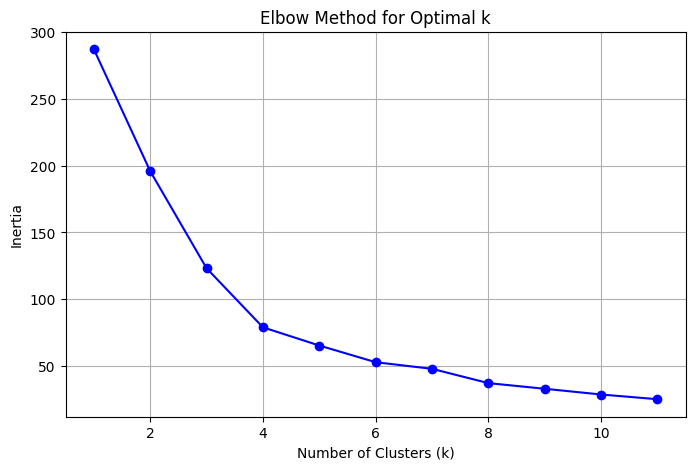

In [201]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** To me, four would be the optimal number of clusters, it still looks like drastic changes at three cluster for me

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [206]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [208]:
# Fit the K-Means model using the scaled DataFrame
model.fit(scaled_market_df)

C:\Users\dljoh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dljoh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [210]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
kmeans_predictions = model.predict(scaled_market_df)

# Print the resulting array of cluster values.
kmeans_predictions

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3])

In [212]:
# Create a copy of the scaled DataFrame
scaled_market_df_new = scaled_market_df.copy()

In [214]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
scaled_market_df_new['kmeans_predictions'] = kmeans_predictions

# Display the copy of the scaled DataFrame
scaled_market_df_new.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,kmeans_predictions
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [216]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
import colorcet as cc
scatter_plot = scaled_market_df_new.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="kmeans_predictions", 
    cmap=cc.rainbow,
    hover_cols=["coin_id"]  
)
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,kmeans_predictions,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [109]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [111]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_market = pca.fit_transform(scaled_market_df_new)

# View the scaled PCA data
pca_market

array([[ 2.03409288, -0.64157137, -0.35762863],
       [ 1.99450168, -0.49054937, -0.91224962],
       [-1.06854412, -0.41720452,  0.5963108 ],
       [-1.04091865, -0.45523427,  0.4678008 ],
       [ 3.30276384, -1.24245766, -0.217276  ],
       [ 2.5056916 , -0.5758319 , -0.12938855],
       [ 2.77004172, -0.49569139, -1.89037102],
       [ 2.37244888, -0.38914627, -0.99251307],
       [ 1.8323439 , -0.67879685, -0.74158098],
       [-0.92810065, -0.74448501,  0.33333703],
       [-2.12671485, -0.19144228,  0.12953513],
       [-1.08164876, -0.42219751,  0.60254407],
       [-1.22038911, -0.66889303,  0.30088169],
       [ 3.72778359, -0.04874508,  0.65364731],
       [-0.78653763, -0.38291335,  0.30355947],
       [ 1.44866298, -0.80042381, -1.70624706],
       [-1.91257321,  0.1154045 ,  0.02017622],
       [-1.19030266, -0.45952527, -0.14487344],
       [ 2.44914105, -0.35041168, -1.13863788],
       [-1.06136261, -0.49829068,  0.6225664 ],
       [-1.60060594, -0.32126157,  0.022

In [121]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.36941241, 0.29169375, 0.22893878])

In [127]:
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()
total_explained_variance

0.8900449398681148

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89%


In [132]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(
    pca_market,
    columns=["PCA1", "PCA2","PCA3"]
)

# Copy the crypto names from the original scaled DataFrame
pca_df["coin_id"] = scaled_market_df.index

# Set the coin_id column as index
pca_df = pca_df.set_index("coin_id")

# Display the scaled PCA DataFrame
pca_df

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,2.034093,-0.641571,-0.357629
ethereum,1.994502,-0.490549,-0.912250
tether,-1.068544,-0.417205,0.596311
ripple,-1.040919,-0.455234,0.467801
bitcoin-cash,3.302764,-1.242458,-0.217276
binancecoin,2.505692,-0.575832,-0.129389
chainlink,2.770042,-0.495691,-1.890371
cardano,2.372449,-0.389146,-0.992513
litecoin,1.832344,-0.678797,-0.741581


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [21]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))
k

In [218]:
# Create an empty list to store the inertia values
inertia2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(pca_df)
    inertia2.append(k_model.inertia_)

C:\Users\dljoh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dljoh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dljoh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dljoh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [220]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia2}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,325.734740
1,2,201.287622
2,3,111.736809
3,4,40.197284
4,5,29.514810


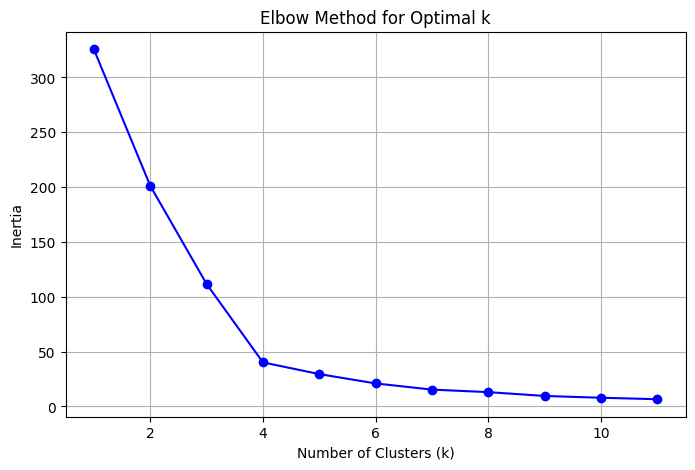

In [222]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Four


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, I said four from the beginning

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [226]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [228]:
# Fit the K-Means model using the PCA data
model.fit(pca_df)

C:\Users\dljoh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dljoh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [230]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
k_4 = model.predict(pca_df)

# Print the resulting array of cluster values.
k_4

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [232]:
# Create a copy of the scaled PCA DataFrame
pca_copy = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_copy["Prediction"] = k_4

# Display the copy of the scaled PCA DataFrame
pca_copy

,PCA1,PCA2,PCA3,Prediction
coin_id,,,,
bitcoin,2.034093,-0.641571,-0.357629,0
ethereum,1.994502,-0.490549,-0.912250,0
tether,-1.068544,-0.417205,0.596311,2
ripple,-1.040919,-0.455234,0.467801,2
bitcoin-cash,3.302764,-1.242458,-0.217276,0
binancecoin,2.505692,-0.575832,-0.129389,0
chainlink,2.770042,-0.495691,-1.890371,0
cardano,2.372449,-0.389146,-0.992513,0
litecoin,1.832344,-0.678797,-0.741581,0


In [234]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = pca_copy.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="Prediction", 
    cmap=cc.rainbow,
    hover_cols=["coin_id"]  
)
scatter_plot

:Scatter   [PCA1]   (PCA2,Prediction,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

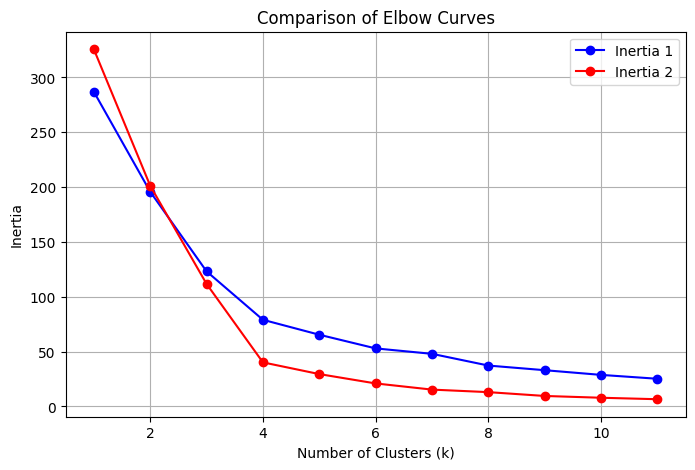

In [240]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b', label='Inertia 1')
plt.plot(k_values, inertia2, marker='o', linestyle='-', color='r', label='Inertia 2')
plt.title('Comparison of Elbow Curves')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)
plt.show()

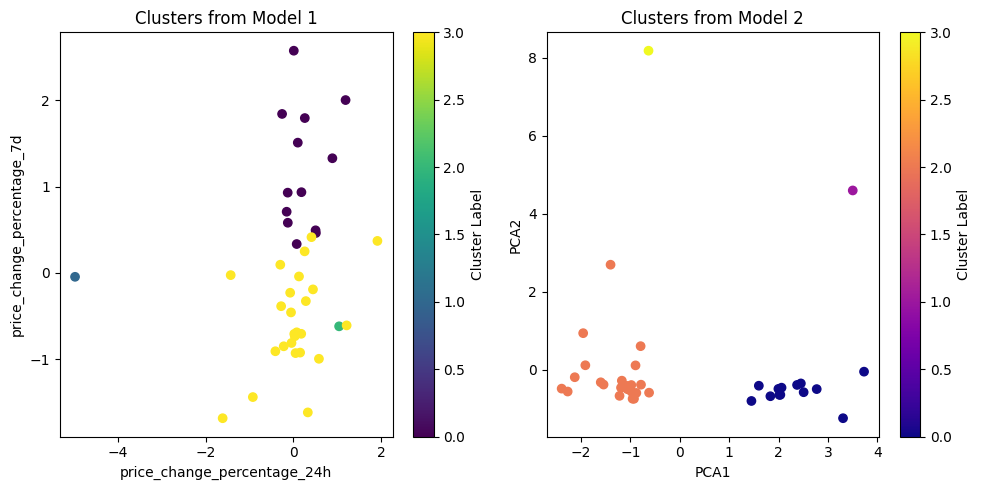

In [250]:
# Composite plot to contrast the clusters
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(scaled_market_df_new['price_change_percentage_24h'], scaled_market_df_new['price_change_percentage_7d'], c=scaled_market_df_new['kmeans_predictions'], cmap='viridis', label='Clusters from Model 1')
plt.title('Clusters from Model 1')
plt.xlabel('price_change_percentage_24h')
plt.ylabel('price_change_percentage_7d')
plt.colorbar(label='Cluster Label')

plt.subplot(1, 2, 2)
plt.scatter(pca_copy['PCA1'], pca_copy['PCA2'], c=pca_copy['Prediction'], cmap='plasma', label='Clusters from Model 2')
plt.title('Clusters from Model 2')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()

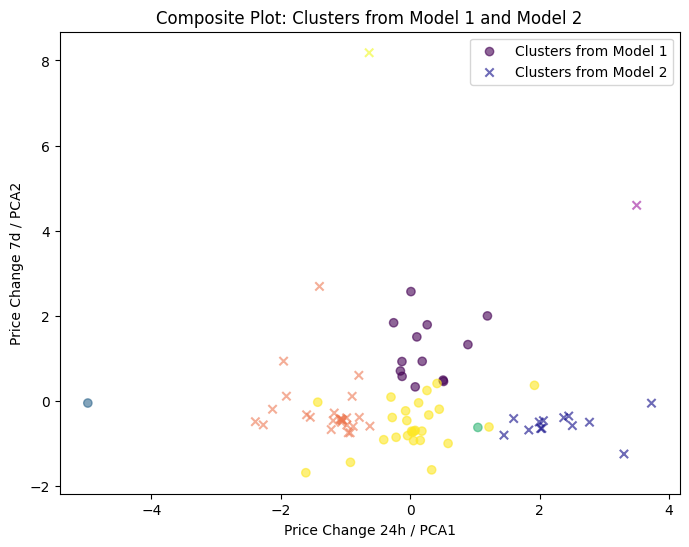

In [252]:
plt.figure(figsize=(8, 6))

# Plot the first set of clusters (from Model 1)
plt.scatter(scaled_market_df_new['price_change_percentage_24h'], 
            scaled_market_df_new['price_change_percentage_7d'], 
            c=scaled_market_df_new['kmeans_predictions'], cmap='viridis', label='Clusters from Model 1', alpha=0.6)

# Plot the second set of clusters (from Model 2)
plt.scatter(pca_copy['PCA1'], pca_copy['PCA2'], 
            c=pca_copy['Prediction'], cmap='plasma', label='Clusters from Model 2', marker='x', alpha=0.6)

# Add title and axis labels
plt.title('Composite Plot: Clusters from Model 1 and Model 2')
plt.xlabel('Price Change 24h / PCA1')
plt.ylabel('Price Change 7d / PCA2')

# Add a legend to differentiate between the models
plt.legend()

# Display the plot
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features, such as PCA-reduced dimensions, can simplify and speed up the clustering process, but it often sacrifices some degree of clarity and interpretability in the clusters. In your case, clusters from both models overlap to some extent, which suggests that the original features (like price change percentages) might capture important aspects of the data that PCA components miss. Balancing the trade-off between feature reduction and cluster quality is key in clustering analysis.